# Homework 5 - Exploring StackOverflow!

In [1]:
## Import Utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from datetime import datetime, date

## 1. Data

Load the data

In [2]:
with open('sx-stackoverflow-a2q.txt') as f:
    a2q = f.readlines()

In [3]:
with open('sx-stackoverflow-c2q.txt') as f:
    c2q = f.readlines()

In [4]:
with open('sx-stackoverflow-c2a.txt') as f:
    c2a = f.readlines()

In [5]:
## Init Graph
G = nx.DiGraph()

In the merged graph we decided to assign the following weigths: \
$\cdot$ 0.6 to *Answers to questions* \
$\cdot$ 0.3 to *Comments to questions* \
$\cdot$ 0.1 to *Comments to answers* \
The reason is that we have thought that the answers to questions are the more relevant than the comments to question, that are more relevant than comments to answers.

In [ ]:
## Merge Graph
t_start = datetime(2009, 10, 1)
t_end = datetime(2010, 10, 1)

for line in a2q:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G.has_edge(line[0], line[1]) :
            G[line[0]][line[1]]['weight'] += 0.6
            G[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G.add_edge(line[0], line[1], weight=0.6)
            G[line[0]][line[1]]['timestamp']=[t_truncated]

for line in c2q:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G.has_edge(line[0], line[1]) :
            G[line[0]][line[1]]['weight'] += 0.3
            G[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G.add_edge(line[0], line[1], weight=0.3)
            G[line[0]][line[1]]['timestamp']=[t_truncated]

for line in c2a:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G.has_edge(line[0], line[1]) :
            G[line[0]][line[1]]['weight'] += 0.1
            G[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G.add_edge(line[0], line[1], weight=0.1)
            G[line[0]][line[1]]['timestamp']=[t_truncated]

## 2. Implementation of the backend

### Functionality 1 - Get the overall features of the graph

In [6]:
## Graph 1

## Init
G_a2q = nx.DiGraph()

t_start = datetime(2010, 10, 1)
t_end = datetime(2010, 11, 1)

## Import data
for line in a2q:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G_a2q.has_edge(line[0], line[1]) :
            G_a2q[line[0]][line[1]]['weight'] += 0.6
            G_a2q[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G_a2q.add_edge(line[0], line[1], weight=0.6)
            G_a2q[line[0]][line[1]]['timestamp']=[t_truncated]

In [54]:
## Graph 2

## Init
G_c2q = nx.DiGraph()

## Import data
for line in c2q:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G_c2q.has_edge(line[0], line[1]) :
            G_c2q[line[0]][line[1]]['weight'] += 0.3
            G_c2q[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G_c2q.add_edge(line[0], line[1], weight=0.3)
            G_c2q[line[0]][line[1]]['timestamp']=[t_truncated]

In [14]:
## Graph 3

## Init
G_c2a = nx.DiGraph()

## Import data
for line in c2a:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G_c2a.has_edge(line[0], line[1]) :
            G_c2a[line[0]][line[1]]['weight'] += 0.1
            G_c2a[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G_c2a.add_edge(line[0], line[1], weight=0.1)
            G_c2a[line[0]][line[1]]['timestamp']=[t_truncated]

#### $\cdot$ Is the graph direct or not?

##### Given a graph G=(V,E), if G is a directed graph the sum of the lengths of all the adjacency list is |E|

In [7]:
l = []
for line in nx.generate_adjlist(G_a2q):
    l.append(line.split(' '))

In [8]:
def is_directed(Graph):
    number_nodes=len(list(G_a2q.nodes))
    sum = 0
    for line in l: 
        sum += len(line)
    if (sum - number_nodes) == len(Graph.edges):  #I subtract the number of nodes because nx.generate_adjlist generates as first element of each list the node we're considering
        return True 
    else:
        return False


In [9]:
is_directed(G_a2q)

True

In [10]:
# Check
nx.is_directed(G_a2q)

True

#### $\cdot$ Number of users

##### the number of users is simply the number of nodes

In [11]:
def n_users(Graph):
    l_nodes=list(Graph.nodes)
    n_nodes=len(l_nodes)
    return(n_nodes)

#### $\cdot$ Number of answers/comments

##### the number of answers/comments is simply the number of edges

In [12]:
def n_answers(Graph):
    l_edges=list(Graph.edges)
    n_edges=len(l_edges)
    return(n_edges)

#### $\cdot$ Average number of links per user

In [13]:
def average(n_edges,n_nodes):
    return(n_edges/n_nodes)

#### $\cdot$ Density degree of the graph

##### The density degree for a directed graph is $D =  \frac{|E|} {(|V| * (|V| - 1))}$, while the density degree for an undirected graph is $D =  \frac{2|E|} {(|V| * (|V| - 1))}$

In [37]:
def density_degre(n_edges, n_nodes):
    if is_directed(G_a2q)==True:
        return(n_edges/(n_nodes*(n_nodes-1)))
    else:
        return(2*n_edges/(n_nodes*(n_nodes-1)))

#### $\cdot$ Is the graph sparse or dense?

##### A sparse graph is a graph for which $|E|$ is much less than $|V^2|$

In [38]:
def graph_mode(n_edges,n_nodes):
    if (n_edges < (n_nodes**2)):
        return("The graph is sparse because the number of edges is " +str(n_edges) + ", that is much less than the square of the number of nodes "+ str(n_nodes**2))
    else:
        return("The graph is dense because the number of edges is close to the square of the number of nodes, in fact the number of edges is " + str(n_edges)+ "and the square of the number of edges is "+ str(n_nodes**2))

In [39]:
def functionality_1(Graph):
    isdirected=is_directed(Graph)
    numbernodes=n_users(Graph)
    numberedges=n_answers(Graph)
    average_=average(numberedges,numbernodes)
    densitydegree=density_degre(numberedges, numbernodes)
    print("Functionality 1 - Get the overall features of the graph")
    print("Is the graph directed?: " + str(isdirected))
    print("Number of users: " + str(numbernodes))
    print("Number of answers: " + str(numberedges))
    print("Average number of links per user: " + str(average_))
    print("Graph density: " +  str(densitydegree))
    print(graph_mode(numberedges, numbernodes))

In [40]:
functionality_1(G_a2q)

Functionality 1 - Get the overall features of the graph
Is the graph directed?: True
Number of users: 48647
Number of answers: 123536
Average number of links per user: 2.539437169815199
Graph density: 5.2202383953772136e-05
The graph is sparse because the number of edges is 123536, that is much less than the square of the number of nodes 2366530609


### Functionality 2 - Find the best users!

### Functionality 3 - Shortest Ordered Route

### Functionality 4 - Disconnecting graphs

## 3. Implementation of the frontend

### Visualization 1 - Visualize the overall features of the graph

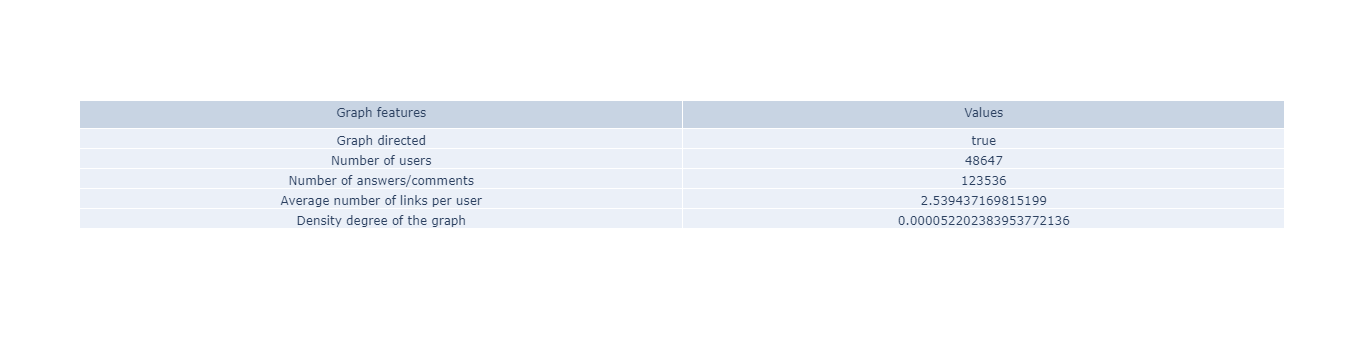

In [53]:
import plotly.graph_objects as go

Graph=G_a2q
isdirected=is_directed(Graph)
numbernodes=n_users(Graph)
numberedges=n_answers(Graph)
average_=average(numberedges,numbernodes)
densitydegree=density_degre(numberedges, numbernodes)
fig = go.Figure(data=[go.Table(header=dict(values=['Graph features', 'Values']),
                 cells=dict(values=[['Graph directed', 'Number of users', 'Number of answers/comments', 'Average number of links per user', 'Density degree of the graph'], [isdirected , numbernodes
        ,numberedges, average_ , densitydegree  ]]))
                     ])
fig.show()


## 4. Algorithmic question

A number n of kids are in a camp. Between some k pairs of them (a kid can be part of more than one pairs) there are often fights. At night there are two dormitories where the kids can sleep. We want, if possible, to assign each kid in one of the two dormitories in such a way that each pair of kids that fights often is assigned to a different dormitory. (There are no space problems and the two dormitories can have different number of kids.)

Give an algorithm that is linear in n and k that is able to answer whether such an assignment is possible and, if so, return one.

In [23]:
def my_algo(kids, pairs):
    '''
    Input:
        - kids : list of kids in the camp
        - pairs : list of pairs of kids
    '''
    
    dorm_1 = [] # List for the first dormitory
    dorm_2 = [] # List for the second dormitory
    visited_kids = [] # list of visited kids
    
    # Focus on the pairs to divide
    for pair in pairs:
        if (pair[0] not in visited_kids) & (pair[1] not in visited_kids):
            visited_kids.append(pair[0]) # Append it to the list of visited
            dorm_1.append(pair[0]) # Assign it to the first dormitory
            
            visited_kids.append(pair[1]) # Append it to the list of visited
            dorm_2.append(pair[1]) # Assign it to the second dormitory
        
        elif (pair[0] in visited_kids) & (pair[1] not in visited_kids):
            # we put the other kid in the pair
            if pair[0] in dorm_1 :
                dorm=dorm_2
            else :
                dorm=dorm_1
            visited_kids.append(pair[1])
            dorm.append(pair[1])
        
        elif (pair[0] not in visited_kids) & (pair[1] in visited_kids):
            # we put the other kid in the pair
            if pair[1] in dorm_1 :
                dorm=dorm_2
            else :
                dorm=dorm_1
            visited_kids.append(pair[0]) 
            dorm.append(pair[0])
           
    # Assign all the others kids in the first dormitory
    for kid in kids:
        if kid not in visited_kids:
            visited_kids.append(kid)
            dorm_1.append(kid)
            
    # Check if we have divided all the fighting couples
    check = True # Initialize a counter
    for pair in pairs:
        if (pair[0] in dorm_1) & (pair[1] in dorm_1):
            print('Two fighting kids in dorm 1!')
            check = False
        if (pair[0] in dorm_2) & (pair[1] in dorm_2):
            print('Two fighting kids in dorm 2!')
            check = False
        
    if not check:
        print("It's impossible to assign these kids in different dorms..")
    else:
        print('First dorm:', dorm_1, '\nSecond dorm:', dorm_2)


Test it with different examples.

In [24]:
pairs = [(1,3),(4,1),(2,4)]
kids = [1,2,3,4,5,6]
my_algo(kids, pairs)

First dorm: [1, 2, 5, 6] 
Second dorm: [3, 4]


In [25]:
pairs = [(1,3),(4,1),(3,4)]
kids = [1,2,3,4,5,6]
my_algo(kids, pairs)

Two fighting kids in dorm 2!
It's impossible to assign these kids in different dorms..


In [26]:
pairs = [(1,3),(4,1),(2,4),(2,1)]
kids = [1,2,3,4,5,6]
my_algo(kids, pairs)

Two fighting kids in dorm 1!
It's impossible to assign these kids in different dorms..
